# Text Clustering - KMeans

## Aim: To implement text clustering using KMeans.

### Dataset used: Text file containg news headlines belonging to 3 categories namely
  * Politics
  * Sports
  * Enteratinment        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install advertools -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install contractions -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install clean-text -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import advertools as adv
import re
import contractions
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
path='/content/drive/MyDrive/clustering.txt'
file = open(path, "r")
# txt=file.read()

In [ ]:
class Preprocess:

  def __init__(self,text):
    self.ltext=text.lower()
    self.text=contractions.fix(self.ltext)
    self.stop_words=set(adv.stopwords['english'])

  def emoji(self):
    e_txt=clean(self.text, no_emoji=True)
    return e_txt

  def remove_links(self,text):
    text  = re.sub(r"https\S+", "", text)
    return text

  def remove_numerics(self,text):
    self.n_text = re.sub("[^a-zA-Z0-9]", " ", text)
    return self.n_text

  def remove_quotes_brackets(self,text):
    self.text1=re.sub("[\"\'\(\)]", "", text)
    return self.text1

  def remove_punctuations(self,text):
    text1=re.sub(r"[^\w\s]", " ",text)
    return text1

  def tokenize(self,text):
    self.t_text=word_tokenize(text)
    return self.t_text

  def stop_word(self,text):
    self.sw=[]
    for i in text:
      if i not in self.stop_words:
        self.sw.append(i)
    return self.sw

  def lemmatize(self,text):
    lemma =WordNetLemmatizer()
    l_text = [lemma.lemmatize(word) for word in text]
    return l_text

  def preprocess(self):
    e_txt=self.emoji()
    link_txt=self.remove_links(e_txt)
    n_txt=self.remove_numerics(link_txt)
    q_text=self.remove_quotes_brackets(n_txt)
    p_text=self.remove_punctuations(q_text)
    t_text=self.tokenize(p_text)
    l_text=self.lemmatize(t_text)
    swtext=self.stop_word(l_text)
    word=' '.join(swtext)
    return word


In [ ]:

# txt

In [ ]:
txt=[]
for text in file:
  s=Preprocess(text)
  p=s.preprocess()
  txt.append(p)
print(txt)

['addressing bjp worker today rally bidar flag bjp s vijay sankalp rath yatra union home minister amit shah slammed congress performance recently concluded election saying seen binocular shah addressed public meeting bjp s vijay sankalpa yatra ahead poll district headquarters town bidar devanahalli near bengaluru lokayukta seized r 8 crore unaccounted cash thursday evening police named channagiri bjp mla madal virupakshappa chairman karnataka soap detergent ltd k dl including son accused bribery case soon fir wa registered virupakshappa sent chief minister basavaraj bommai letter resignation chairman k dl absconding according source', 'wa bjp bastion till ravindra dhangekar pulled upset thursday 56 year old congress leader ended ruling party s decade hold kasba peth assembly constituency maharashtra s pune district victory built superior network area united maha vikas aghadi mva benefitted division bjp shiv sena worker entered politics sena founder balasaheb thackeray dhangekar wa know

In [ ]:
# t=Preprocess(txt)
# text=[t.preprocess()
# print(text)

addressing bjp worker today rally bidar flag bjp s vijay sankalp rath yatra union home minister amit shah slammed congress performance recently concluded election saying seen binocular shah addressed public meeting bjp s vijay sankalpa yatra ahead poll district headquarters town bidar devanahalli near bengaluru lokayukta seized r 8 crore unaccounted cash thursday evening police named channagiri bjp mla madal virupakshappa chairman karnataka soap detergent ltd k dl including son accused bribery case soon fir wa registered virupakshappa sent chief minister basavaraj bommai letter resignation chairman k dl absconding according source wa bjp bastion till ravindra dhangekar pulled upset thursday 56 year old congress leader ended ruling party s decade hold kasba peth assembly constituency maharashtra s pune district victory built superior network area united maha vikas aghadi mva benefitted division bjp shiv sena worker entered politics sena founder balasaheb thackeray dhangekar wa known loy

In [ ]:
vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(txt)

In [ ]:
Z

<13x569 sparse matrix of type '<class 'numpy.float64'>'
	with 652 stored elements in Compressed Sparse Row format>

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100)
kmeans.fit(Z)
centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Cluster 0: final india test qualify blaster bengaluru ahmedabad draw win semi
Cluster 1: cambridge gandhi speech rahul loss bjp jbs blame jaiveer cry
Cluster 2: film wa hockey sport money rana series like play world
Cluster 3: bjp chief minister party today election state dmk councillor allegedly
Cluster 4: sena dhangekar mn corporator thackeray pune maharashtra wa bjp assembly


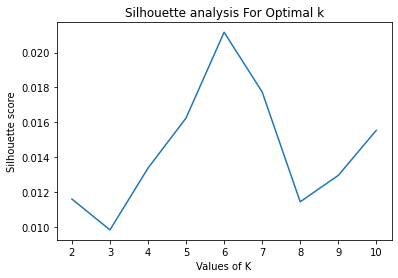

In [ ]:
from sklearn.metrics import silhouette_score
import seaborn as sns
silhouette_avg = []
for i in range(2,11):
 km = KMeans(n_clusters=i, init = 'k-means++', random_state =42)
 km.fit_predict(Z)
 silhouette_avg.append(silhouette_score(Z, km.labels_))

sns.lineplot(range(2,11),silhouette_avg)
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

Cluster 0: film wa money sport rana series like play family daggubati
Cluster 1: final india cambridge qualify test loss blaster gandhi bengaluru draw
Cluster 2: sena dhangekar mn corporator thackeray pune maharashtra wa bjp assembly
Cluster 3: bjp chief minister party today election state dmk councillor allegedly
Cluster 4: deepika dwayne johnson post presenter oscar troy mccarthy oscars95 includes
Cluster 5: hockey high finish coach indian world aussie little administrator african


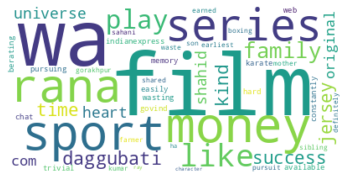

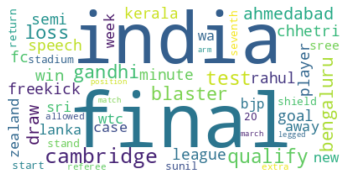

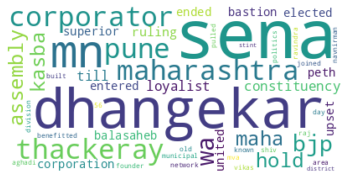

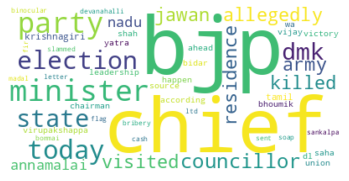

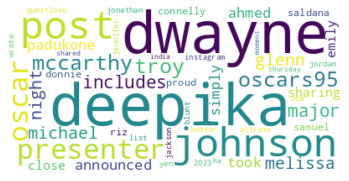

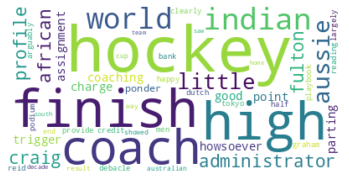

In [ ]:
# optimal clusters 6
from wordcloud import WordCloud
kms = KMeans(n_clusters=6, init='k-means++', max_iter=100)
kms.fit(Z)
centroids = kms.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

def frequencies_dict(cluster_index):
    if cluster_index > 6- 1:
        return
    term_frequencies = kms.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):
    wc = WordCloud(background_color="white", max_words=50)
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(6):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()

## Conclusion: The optimal number of clusters is 3 based on the categories present in text file. But the silhoutte score gives optimum clusters as 6. Thus the KMeans doesnot cluster the given text correctly.